# **Proyek Visualisasi Data**
<hr>

Kelas: Visualisasi Data - TIF A

Kelompok 3:

1. Riski Darmawan   (195150200111039)
2. Aldi Fianda Putra    (195150201111034)
3. Hasyir Daffa Ibrahim     (195150207111039)

<hr>
<hr>
<hr>

# 1. Deskripsi Data

**Dataset:** Myocardial Infarction Complications

Sumber: https://archive.ics.uci.edu/ml/datasets/Myocardial+infarction+complications

Dataset Myocardial infarction Compilation merupakan dataset yang dikumpulkan di Krasnoyarsk Interdistrict Clinical Hospital (I. S. Berzon (Russia)) pada tahun 1992-1995. Dataset ini terdiri atas 1700 data dengan 124 atribut. Atribut 2 hingga atribut ke 112 berperan sebagai data input untuk melakukan prediksi, kumpulan atribut ini sendiri terdiri atas atribut yang bersifat kategorikal dan non-kategorikal. Sedangkan atribut 113 hingga 123 adalah atribut kategorikal, namun kumpulan atribut ini bertujuan untuk mendefinisikan kompilasi yang dialami pasien, seperti atrial fibrillation (gangguan aritmia jantung), supraventricular tachycardia (gangguan irama jantung), ventricular tachycardia (detak jantung yang sangat cepat) dan gangguan lainnya.



In [ ]:
# Import modul / dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify    # pip install squarify (algorithm for treemap)

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import warnings
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn import metrics

# Install package yang dibutuhkan
!pip install imblearn
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 KB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 KB 36.5 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 KB 28.3 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
# read dataset
df = pd.read_csv("Myocardial infarction complications Database.csv")
df

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,1696,77.0,0,0.0,4.0,2.0,1.0,NaN,2.0,0.0,...,0,0,1,0,1,0,0,0,0,3
1696,1697,70.0,0,0.0,6.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1697,1698,55.0,1,3.0,6.0,2.0,2.0,NaN,0.0,0.0,...,0,0,0,0,0,0,0,1,0,6
1698,1699,79.0,0,2.0,2.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,1,0,0,0,0,0,1


<hr>
<hr>

# 2. EDA & Preprocessing

## 2.1. EDA (Exploratory Data Analysis)

Mendapatkan informasi umum dari dataset

In [ ]:
# Mendapatkan informasi umum dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 124 entries, ID to LET_IS
dtypes: float64(110), int64(14)
memory usage: 1.6 MB


In [ ]:
# Mendapatkan dimensi dataset, yaitu jumlah record dan kolom
df.shape

(1700, 124)

Mendapatkan rangkuman informasi deskriptif dari fitur data yang dapat dihitung secara statistik

In [ ]:
# Mendapatkan rangkuman informasi deskriptif
df.describe()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
count,1700.000000,1692.000000,1700.000000,1696.000000,1594.000000,1627.000000,1649.000000,72.00000,1691.000000,1692.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,850.500000,61.856974,0.626471,0.554835,2.316186,1.205286,1.160703,0.37500,1.393258,0.033688,...,0.024706,0.041765,0.033529,0.093529,0.031765,0.044118,0.231765,0.093529,0.087059,0.477059
std,490.892045,11.259936,0.483883,0.836801,2.440586,1.040814,0.801400,0.48752,1.088803,0.180478,...,0.155273,0.200110,0.180067,0.291259,0.175425,0.205417,0.422084,0.291259,0.282004,1.381818
min,1.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,425.750000,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,850.500000,63.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.00000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1275.250000,70.000000,1.000000,1.000000,5.000000,2.000000,2.000000,1.00000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1700.000000,92.000000,1.000000,3.000000,6.000000,4.000000,2.000000,1.00000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


Mendapatkan informasi jumlah data setiap kelas

In [ ]:
# Mendapatkan informasi jumlah data setiap kelas
df.groupby("LET_IS").size()

LET_IS
0    1429
1     110
2      18
3      54
4      23
5      12
6      27
7      27
dtype: int64

Mendapatkan informasi missing value pada dataset

In [ ]:
# Mendapatkan informasi missing value
df.isnull().sum()

ID             0
AGE            8
SEX            0
INF_ANAM       4
STENOK_AN    106
            ... 
DRESSLER       0
ZSN            0
REC_IM         0
P_IM_STEN      0
LET_IS         0
Length: 124, dtype: int64

## 2.2. Preprocessing

### Handle Missing Value dengan Imputasi Data

In [ ]:
df.isnull().values.any()

True

Diketahui terdapat missing value pada dataset. Missing value tersebut akan ditangani (handle) dengan melakukan imputasi data menggunakan nilai rata-rata / mean

In [ ]:
# fungsi imputasi missing value pada dataset dengan mean / rata-rata
def imputasi(df_input):
  list_columns = df_input.columns
  class_column = list_columns[-1]  
  for column in list_columns[:-1] :
    df_input[column] = df_input[column].fillna(round(df_input.groupby(class_column)[column].transform('mean'),0))
    df_input[column] = df_input[column].fillna(df_input[column].mean())
  return df_input

In [ ]:
# mengaplikasikan fungsi imputasi pada dataset
df = imputasi(df)

In [ ]:
# preview dataset setelah handle missing value
df

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,0.000000,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,0.000000,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,0.000000,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,0.000000,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,1696,77.0,0,0.0,4.0,2.0,1.0,0.017341,2.0,0.0,...,0,0,1,0,1,0,0,0,0,3
1696,1697,70.0,0,0.0,6.0,2.0,1.0,0.000000,2.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1697,1698,55.0,1,3.0,6.0,2.0,2.0,0.017341,0.0,0.0,...,0,0,0,0,0,0,0,1,0,6
1698,1699,79.0,0,2.0,2.0,2.0,1.0,0.000000,2.0,0.0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
df.isnull().values.any()

False

Pada data imputasi diatas terlihat sudah tidak ada data yang hilang sehingga preprocessing dapat dilanjutkan ke tahap berikutnya.

### Normalisasi Min-Max

Pada bagian ini, dilakukan normalisasi min-max. Data yang dinormalisasi hanya data kontinu atau data non kategorikal saja.

In [ ]:
# fungsi melihat rentang data pada setiap fitur dataset
def cetak_rentang(df_input):
  list_fitur=df_input.columns[:-1] #Mengambil nama kolom, 
  #Kecuali yang terakhir (kelas)
  for fitur in list_fitur:
    max=df_input[fitur].max()
    min=df_input[fitur].min()
    print("Rentang fitur", fitur, "Adalah", max-min)

In [ ]:
# memanggil fungsi melihat rentang data
cetak_rentang(df)

Rentang fitur ID Adalah 1699
Rentang fitur AGE Adalah 66.0
Rentang fitur SEX Adalah 1
Rentang fitur INF_ANAM Adalah 3.0
Rentang fitur STENOK_AN Adalah 6.0
Rentang fitur FK_STENOK Adalah 4.0
Rentang fitur IBS_POST Adalah 2.0
Rentang fitur IBS_NASL Adalah 1.0
Rentang fitur GB Adalah 3.0
Rentang fitur SIM_GIPERT Adalah 1.0
Rentang fitur DLIT_AG Adalah 7.0
Rentang fitur ZSN_A Adalah 4.0
Rentang fitur nr_11 Adalah 1.0
Rentang fitur nr_01 Adalah 1.0
Rentang fitur nr_02 Adalah 1.0
Rentang fitur nr_03 Adalah 1.0
Rentang fitur nr_04 Adalah 1.0
Rentang fitur nr_07 Adalah 1.0
Rentang fitur nr_08 Adalah 1.0
Rentang fitur np_01 Adalah 1.0
Rentang fitur np_04 Adalah 1.0
Rentang fitur np_05 Adalah 1.0
Rentang fitur np_07 Adalah 1.0
Rentang fitur np_08 Adalah 1.0
Rentang fitur np_09 Adalah 1.0
Rentang fitur np_10 Adalah 1.0
Rentang fitur endocr_01 Adalah 1.0
Rentang fitur endocr_02 Adalah 1.0
Rentang fitur endocr_03 Adalah 1.0
Rentang fitur zab_leg_01 Adalah 1.0
Rentang fitur zab_leg_02 Adalah 1.0
Ren

In [ ]:
# mendefinisikan fitur mana saja yang dilakukan normalisasi, yaitu fitur dengan data kontinu
kolomfitur = ['S_AD_KBRIG','D_AD_KBRIG','S_AD_ORIT','D_AD_ORIT','K_BLOOD','NA_BLOOD',
              'ALT_BLOOD','AST_BLOOD','KFK_BLOOD','L_BLOOD','ROE']

# melakukan normalisasi min-max
from sklearn.preprocessing import MinMaxScaler
normalisasi = MinMaxScaler()
df[kolomfitur] = normalisasi.fit_transform(df[kolomfitur])

In [ ]:
# preview dataset setelah normalisasi min-max
df

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,0.000000,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,0.000000,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,0.000000,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,0.000000,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,1696,77.0,0,0.0,4.0,2.0,1.0,0.017341,2.0,0.0,...,0,0,1,0,1,0,0,0,0,3
1696,1697,70.0,0,0.0,6.0,2.0,1.0,0.000000,2.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1697,1698,55.0,1,3.0,6.0,2.0,2.0,0.017341,0.0,0.0,...,0,0,0,0,0,0,0,1,0,6
1698,1699,79.0,0,2.0,2.0,2.0,1.0,0.000000,2.0,0.0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
# memanggil fungsi melihat rentang data untuk cek hasil normalisasi
cetak_rentang(df)

Rentang fitur ID Adalah 1699
Rentang fitur AGE Adalah 66.0
Rentang fitur SEX Adalah 1
Rentang fitur INF_ANAM Adalah 3.0
Rentang fitur STENOK_AN Adalah 6.0
Rentang fitur FK_STENOK Adalah 4.0
Rentang fitur IBS_POST Adalah 2.0
Rentang fitur IBS_NASL Adalah 1.0
Rentang fitur GB Adalah 3.0
Rentang fitur SIM_GIPERT Adalah 1.0
Rentang fitur DLIT_AG Adalah 7.0
Rentang fitur ZSN_A Adalah 4.0
Rentang fitur nr_11 Adalah 1.0
Rentang fitur nr_01 Adalah 1.0
Rentang fitur nr_02 Adalah 1.0
Rentang fitur nr_03 Adalah 1.0
Rentang fitur nr_04 Adalah 1.0
Rentang fitur nr_07 Adalah 1.0
Rentang fitur nr_08 Adalah 1.0
Rentang fitur np_01 Adalah 1.0
Rentang fitur np_04 Adalah 1.0
Rentang fitur np_05 Adalah 1.0
Rentang fitur np_07 Adalah 1.0
Rentang fitur np_08 Adalah 1.0
Rentang fitur np_09 Adalah 1.0
Rentang fitur np_10 Adalah 1.0
Rentang fitur endocr_01 Adalah 1.0
Rentang fitur endocr_02 Adalah 1.0
Rentang fitur endocr_03 Adalah 1.0
Rentang fitur zab_leg_01 Adalah 1.0
Rentang fitur zab_leg_02 Adalah 1.0
Ren

Rentang fitur datanya sekarang sudah 1.0 kecuali data yang bersifat kategorikal

## 2.3. Visualisasi

### 2.3.1. Basic Visualization

**Visualisasi Pie Chart untuk Prosentase Pasien Hidup dan Meninggal**

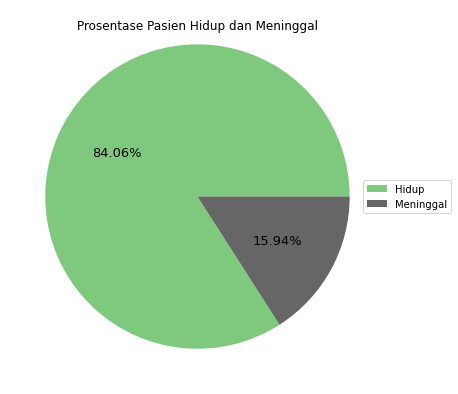

In [ ]:
# mengambil kelas dataset dengan grouping
jumlah_tiap_kelas = df.groupby("LET_IS").size()
jumlah_tiap_kelas.index = ["Hidup", "Syok Kardiogenik", "Edema Paru", "Myocardial Rupture",
    "Gagal Jantung Kongestif", "Thromboembolism", "Asystole", "Ventrikular Fibrilasi"]

# ekstrak jumlah pasien hidup dan meninggal, serta visualisasi
jumlah_hidup_mati = pd.Series(data={"Hidup":jumlah_tiap_kelas[0], "Meninggal":jumlah_tiap_kelas[1:].sum()})
jumlah_hidup_mati.plot(kind='pie', autopct="%.2f%%", figsize=(7, 7),
        colormap='Accent', legend=True, labeldistance=None, textprops={'fontsize': 13})

plt.title("Prosentase Pasien Hidup dan Meninggal", y=.925)
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center')

plt.show()

--> Rumusan Masalah

1. Seberapa besar rasio pasien yang hidup dan pasien yang meninggal akibat penyakit jantung?

--> Analisa / Penjelasan

Pada dataset ini, atribut ke 124 yang bernama LET_IS merupakan lethal outcome yang menunjukkan klasifikasi diagnosa penyakit jantung yang diderita pasien. Pada kelas ini, terdapat 8 klasifikasi diagnosa yang secara singkat menunjukkan apakah pasien hidup atau meninggal dengan diagnosa tertentu. Oleh sebab itu kelas ini juga dapat bersifat biner, yaitu hidup atau meninggal.

Pada visualisasi di atas, ditampilkan Pie Chart untuk menunjukkan prosentase pasien yang hidup dan meninggal. Dari sekian banyak pasien, diketahui hampir 16% diantaranya meninggal dengan diagnosa penyakit jantung tertentu.

**Visualisasi Bar Chart untuk Jumlah Kematian Pasien Berdasarkan Diagnosa**

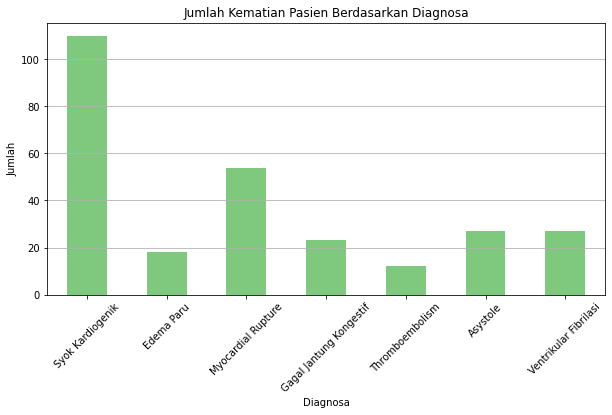

In [ ]:
# mengambil jumlah pasien meninggal dan visualisasi 
jumlah_tiap_kelas[1:].plot(kind='bar', figsize=(10, 5), colormap='Accent')

plt.title("Jumlah Kematian Pasien Berdasarkan Diagnosa")
plt.ylabel("Jumlah")
plt.xlabel("Diagnosa")
plt.xticks(rotation=45)
plt.grid(True, axis='y')

plt.show()

--> Rumusan masalah

1. Apa diagnosa penyakit jantung yang menyebabkan kematian pasien terbanyak?

--> Analisa / Penjelasan

Seperti yang telah diketahui sebelumnya, kelas LET_IS dapat bersifat biner, yaitu hidup atau meninggal. Pasien yang meninggal dapat disebabkan oleh berbagai diagnosa penyakit jantung. Pada visualisasi di atas, ditampilkan bar plot untuk menunjukkan jumlah kematian pasien berdasarkan diagnosanya. Diketahui, Syok Kardiogenik merupakan diagnosa yang paling banyak / paling sering menyebabkan kematian pasien.

**Visualisasi Bar Chart Jumlah Kasus Pasien Berdasarkan Komplikasi**

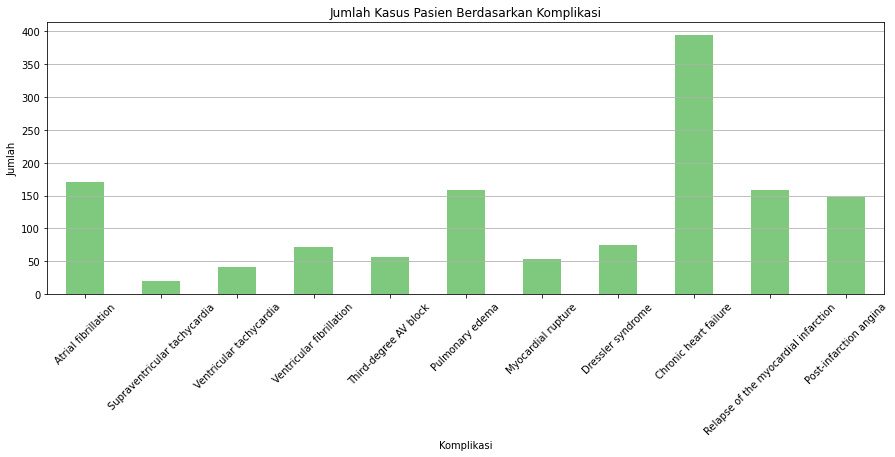

In [ ]:
# mengambil data komplikasi pasien
komplikasi_dict = {}
komplikasi_dict["Atrial fibrillation"] = df.groupby("FIBR_PREDS").size()[1]
komplikasi_dict["Supraventricular tachycardia"] = df.groupby("PREDS_TAH").size()[1]
komplikasi_dict["Ventricular tachycardia"] = df.groupby("JELUD_TAH").size()[1]
komplikasi_dict["Ventricular fibrillation"] = df.groupby("FIBR_JELUD").size()[1]
komplikasi_dict["Third-degree AV block"] = df.groupby("A_V_BLOK").size()[1]
komplikasi_dict["Pulmonary edema"] = df.groupby("OTEK_LANC").size()[1]
komplikasi_dict["Myocardial rupture"] = df.groupby("RAZRIV").size()[1]
komplikasi_dict["Dressler syndrome"] = df.groupby("DRESSLER").size()[1]
komplikasi_dict["Chronic heart failure"] = df.groupby("ZSN").size()[1]
komplikasi_dict["Relapse of the myocardial infarction"] = df.groupby("REC_IM").size()[1]
komplikasi_dict["Post-infarction angina"] = df.groupby("P_IM_STEN").size()[1]

# visualisasi komplikasi pasien
komplikasi = pd.Series(data=komplikasi_dict)
komplikasi.plot(kind='bar', figsize=(15, 5), colormap='Accent')

plt.title("Jumlah Kasus Pasien Berdasarkan Komplikasi")
plt.ylabel("Jumlah")
plt.xlabel("Komplikasi")
plt.xticks(rotation=45)
plt.grid(True, axis='y')

plt.show()

--> Rumusan masalah

1. Apa komplikasi penyakit jantung yang paling banyak diderita oleh pasien?

2. Apa komplikasi penyakit jantung yang paling sedikit diderita oleh pasien?

--> Analisa / Penjelasan

Pada dataset ini, informasi tidak hanya terbatas pada diagnosa kematian pasien saja. Terdapat informasi lain berupa komplikasi atau kondisi yang diakibatkan penyakit yang diderita pasien. Diketahui satu atau kombinasi komplikasi pada pasien dapat disimpulkan sebagai suatu diagnosa kematian pasien. Namun, tidak semua komplikasi atau kombinasi komplikasi menyebabkan kematian pasien karena telah diketahui sebelumnya bahwa jumlah pasien hidup atau sembuh dari penyakit ini lebih banyak daripada pasien yang meninggal.

Pada visualisasi di atas, ditampilkan bar plot yang menunjukkan jumlah komplikasi yang dapat diderita oleh pasien. Diketahui bahwa gagal jantung kronis merupakan komplikasi yang paling banyak / paling sering diderita oleh pasien. Sedangkan Supraventricular tachycardia merupakan komplikasi yang paling sedikit / paling jarang diderita pasien.

**Visualisasi Histogram untuk Distribusi Umur Pasien**

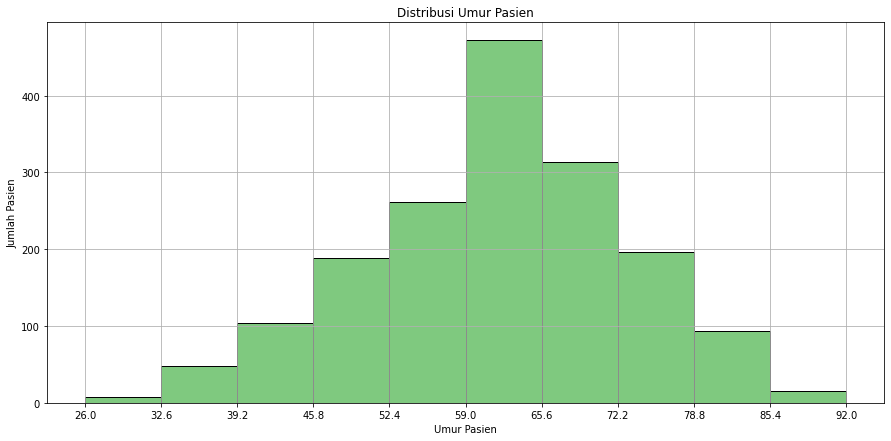

In [ ]:
# histogram umur pasien
count_all, bin_edge_all = np.histogram(df["AGE"])
df["AGE"].plot(kind='hist', figsize=(15, 7), colormap='Accent', xticks=bin_edge_all, edgecolor='k')

plt.title("Distribusi Umur Pasien")
plt.ylabel("Jumlah Pasien")
plt.xlabel("Umur Pasien")
plt.grid(True, axis='both')

plt.show()

--> Rumusan masalah

1. Berapa rentang usia pasien yang paling banyak menderita penyakit jantung?

--> Analisa / Penjelasan

Pada dataset ini, pasien yang tercatat merupakan pasien dewasa hingga lanjut usia. Pada visualisasi di atas, ditampilkan histogram yang menunjukkan distribusi / persebaran umur pasien setelah dikelompokkan menjadi 10 rentang umur. Diketahui, pasien dari umur 59 hingga 65 merupakan pasien yang tercatat paling banyak menderita penyakit jantung.

**Visualisasi Histogram untuk Jumlah kematian Berdasarkan Rentang Umur (pada Histogram sebelumnya)**

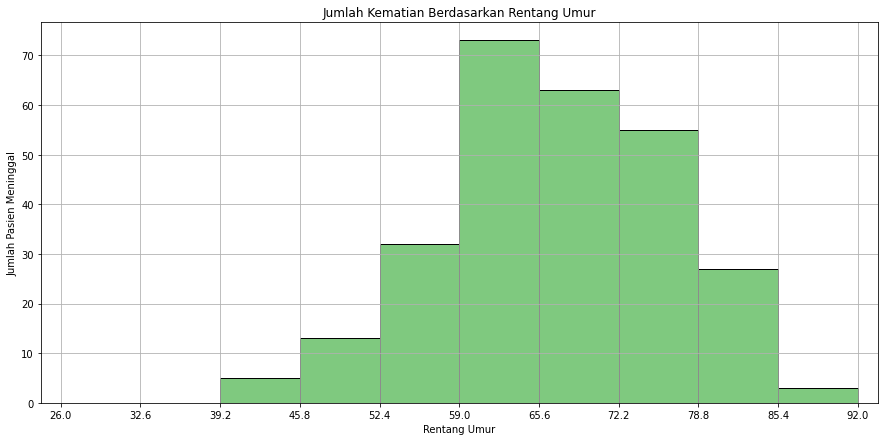

In [ ]:
# mengambil data jumlah kematian berdasarkan rentang umur pasien pada histogram sebelumnya 
kematian_umur_dict = {}
kematian_umur_dict["26-32"] = df.loc[(df['AGE'] >= 26) & (df['AGE'] <= 32.6) & (df['LET_IS'] != 0), 'LET_IS'].count()
kematian_umur_dict["32-39"] = df.loc[(df['AGE'] > 32.6) & (df['AGE'] <= 39.2) & (df['LET_IS'] != 0), 'LET_IS'].count()
kematian_umur_dict["39-45"] = df.loc[(df['AGE'] > 39.2) & (df['AGE'] <= 45.8) & (df['LET_IS'] != 0), 'LET_IS'].count()
kematian_umur_dict["45-52"] = df.loc[(df['AGE'] > 45.8) & (df['AGE'] <= 52.4) & (df['LET_IS'] != 0), 'LET_IS'].count()
kematian_umur_dict["52-59"] = df.loc[(df['AGE'] > 52.4) & (df['AGE'] <= 59) & (df['LET_IS'] != 0), 'LET_IS'].count()
kematian_umur_dict["59-65"] = df.loc[(df['AGE'] > 59) & (df['AGE'] <= 65.6) & (df['LET_IS'] != 0), 'LET_IS'].count()
kematian_umur_dict["65-72"] = df.loc[(df['AGE'] > 65.6) & (df['AGE'] <= 72.2) & (df['LET_IS'] != 0), 'LET_IS'].count()
kematian_umur_dict["72-78"] = df.loc[(df['AGE'] > 72.2) & (df['AGE'] <= 78.8) & (df['LET_IS'] != 0), 'LET_IS'].count()
kematian_umur_dict["78-85"] = df.loc[(df['AGE'] > 78.8) & (df['AGE'] <= 85.4) & (df['LET_IS'] != 0), 'LET_IS'].count()
kematian_umur_dict["85-92"] = df.loc[(df['AGE'] > 85) & (df['AGE'] <= 92) & (df['LET_IS'] != 0), 'LET_IS'].count()
# kematian_umur_dict

# visualisasi jumlah kematian berdasarkan rentang umur pasien
kematian_umur = pd.Series(data=kematian_umur_dict)
kematian_umur.plot(kind='bar', figsize=(15, 7), colormap='Accent', width=1, edgecolor='k',
                  xticks=np.arange(-.5, 10.5, 1)).set_xticklabels(bin_edge_all.round(2))

plt.title("Jumlah Kematian Berdasarkan Rentang Umur")
plt.ylabel("Jumlah Pasien Meninggal")
plt.xlabel("Rentang Umur")
plt.xticks(rotation=0)
plt.grid(True, axis='both')

plt.show()

--> Rumusan masalah

1. Berapa rentang usia pasien yang paling banyak meninggal akibat penyakit jantung?

--> Analisa / Penjelasan

Pada visualisasi di atas, ditampilkan histogram yang menunjukkan frekuensi / jumlah pasien yang meninggal berdasarkan rentang umur pada visualisasi histogram sebelumnya. Diketahui, jumlah kematian tertinggi ada pada rentang umur 59 - 65. Selain itu, diketahui juga bahwa pasien dengan umur 59 ke atas cenderung meninggal dunia akibat penyakit jantung dibandingkan pasien dengan umur 59 ke bawah. Diketahui juga, pasien dengan umur 39 ke bawah tidak ada yang meninggal atau dengan kata lain pasien dapat pulih dari penyakitnya. Namun, fakta tersebut hanya menyebutkan jumlah pasien meninggal saja. Rasio atau tingkat kematian pasien sulit untuk dilihat dan diketahui. Oleh sebab itu, diperlukan visualisasi lebih lanjut untuk mengetahui hal tersebut.

**Visualisasi Bar Plot untuk Distribusi Jenis Kelamin Pasien**

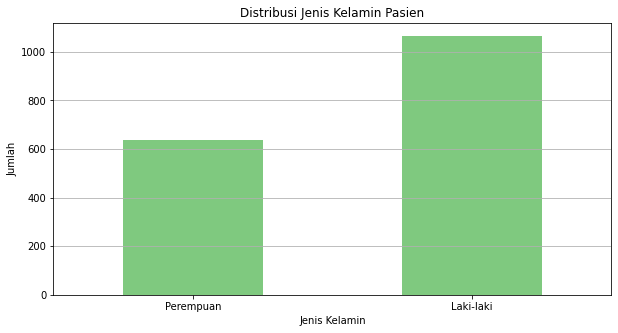

In [ ]:
# histogram jenis kelamin pasien
jumlah_sex_pasien = df.groupby("SEX").size()
jumlah_sex_pasien.index = ["Perempuan", "Laki-laki"]

jumlah_sex_pasien.plot(kind='bar', figsize=(10, 5), colormap='Accent')

plt.title("Distribusi Jenis Kelamin Pasien")
plt.ylabel("Jumlah")
plt.xlabel("Jenis Kelamin")
plt.xticks(rotation=0)
plt.grid(True, axis='y')

plt.show()

--> Rumusan masalah

1. Di antara pasien laki-laki dan perempuan, pasien manakah yang paling banyak menderita penyakit jantung?

--> Analisa / Penjelasan

Pada dataset ini, pasien terdiri dari perempuan dan laki-laki. Pada visualisasi di atas, ditampilkan bar plot yang menunjukkan distribusi / persebaran jenis kelamin pasien. Dikethaui, pasien laki-laki merupakan pasien yang tercatat paling banyak menderita penyakit jantung. 

**Visualisasi Bar Plot untuk Jumlah Kematian Berdasarkan Jenis Kelamin**

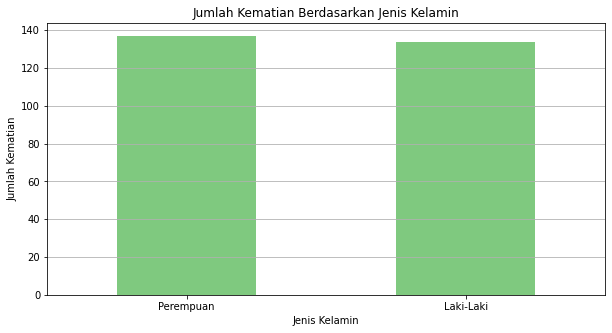

In [ ]:
# mengambil data jumlah kematian berdasarkan jenis kelamin
kematian_sex_dict = {}
kematian_sex_dict["Perempuan"] = df.loc[(df['SEX'] == 0) & (df['LET_IS'] != 0), 'LET_IS'].count()
kematian_sex_dict["Laki-Laki"] = df.loc[(df['SEX'] == 1) & (df['LET_IS'] != 0), 'LET_IS'].count()
# kematian_sex_dict

# visualisasi jumlah kematian berdasarkan jenis kelamin
kematian_sex = pd.Series(data=kematian_sex_dict)
kematian_sex.plot(kind='bar', figsize=(10, 5), colormap='Accent')

plt.title("Jumlah Kematian Berdasarkan Jenis Kelamin")
plt.ylabel("Jumlah Kematian")
plt.xlabel("Jenis Kelamin")
plt.xticks(rotation=0)
plt.grid(True, axis='y')

plt.show()

--> Rumusan masalah

1. Di antara pasien laki-laki dan perempuan, pasien manakah yang paling banyak meninggal akibat penyakit jantung?

--> Analisa / Penjelasan

Pada visualisasi di atas, ditampilkan bar plot yang menunjukkan jumlah pasien yang meninggal berdasarkan jenis kelamin. Diketahui, jumlah kematian pasien perempuan sedikit lebih banyak daripada pasien laki-laki. Dengan kata lain, jumlah kematian antara perempuan dan laki-laki hampir sama. Namun, fakta tersebut hanya menyebutkan jumlah pasien meninggal saja. Rasio atau tingkat kematian pasien sulit untuk dilihat dan diketahui. Oleh sebab itu, diperlukan visualisasi lebih lanjut untuk mengetahui hal tersebut.

**Visualisasi Tree Map untuk Diagnosa Kematian Utama pada Pasien Perempuan**

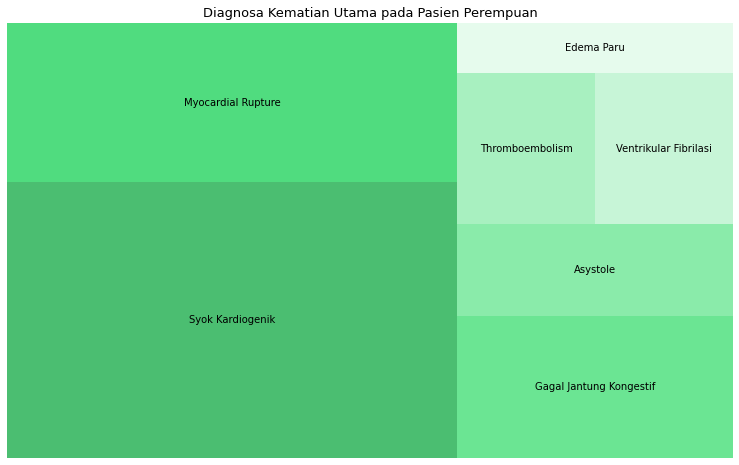

In [ ]:
# mengambil diagnosa kematian utama pada pasien perempuan
kematian_perempuan = df.loc[(df['SEX'] == 0) & (df['LET_IS'] != 0)].groupby("LET_IS").size()
kematian_perempuan.index = jumlah_tiap_kelas[1:].index
kematian_perempuan = kematian_perempuan.sort_values(ascending=False)

# visualisasi treemap plot untuk data diagnosa kematian utama pasien perempuan
plt.figure(figsize=(13,8))
colors=['#1eae4e','#25d45f','#47df79', '#6de695', '#93edb1', '#baf3cd', '#e0fae9']
squarify.plot(sizes=kematian_perempuan, label=kematian_perempuan.index,
        color=colors, alpha=.8)

plt.title("Diagnosa Kematian Utama pada Pasien Perempuan", fontsize=13)
# plt.rc('font', size=7)
plt.axis('off')
plt.show()

--> Rumusan masalah

1. Apa diagnosa penyakit jantung yang paling utama yang menyebabkan kematian pasien perempuan?

--> Analisa / Penjelasan

Pada visualisasi di atas, ditampilkan tree map yang menunjukkan diagnosa kematian utama pada pasien perempuan. Kategori dengan ukuran yang lebih besar menunjukkan frekuensi yang lebih banyak dibanding yang kategori dengan ukuran lebih kecil. Dengan kata lain, visualisasi ini merupakan alternatif dari bar plot. Diketahui, Syok Kardiogenik merupakan diagnosa yang paling banyak / paling sering menyebabkan kematian pasien perempuan, disusul oleh Myocardial Rupture.

**Visualisasi Tree Map untuk Diagnosa Kematian Utama pada Pasien Laki-laki**

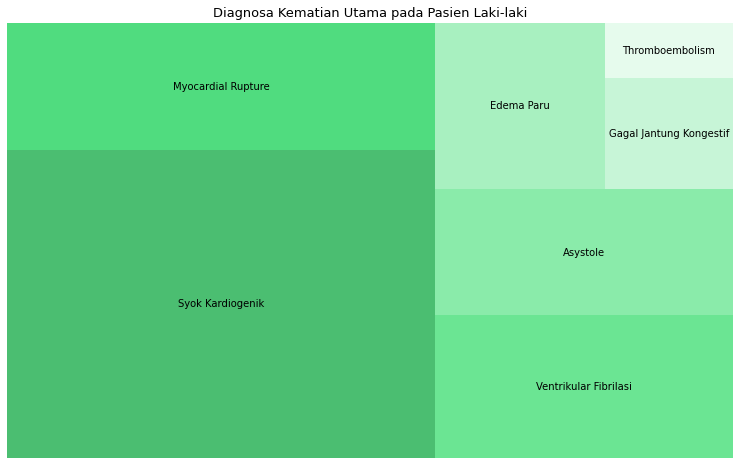

In [ ]:
# mengambil diagnosa kematian utama pada pasien laki-laki
kematian_laki = df.loc[(df['SEX'] == 1) & (df['LET_IS'] != 0)].groupby("LET_IS").size()
kematian_laki.index = jumlah_tiap_kelas[1:].index
kematian_laki = kematian_laki.sort_values(ascending=False)

# visualisasi treemap plot untuk data diagnosa kematian utama pasien laki-laki
plt.figure(figsize=(13,8))
colors=['#1eae4e','#25d45f','#47df79', '#6de695', '#93edb1', '#baf3cd', '#e0fae9']
squarify.plot(sizes=kematian_laki, label=kematian_laki.index,
        color=colors, alpha=.8)

plt.title("Diagnosa Kematian Utama pada Pasien Laki-laki", fontsize=13)
# plt.rc('font', size=7)
plt.axis('off')
plt.show()

--> Rumusan masalah

1. Apa diagnosa penyakit jantung yang paling utama yang menyebabkan kematian pasien laki-laki?

--> Analisa / Penjelasan

Pada visualisasi di atas, ditampilkan tree map yang menunjukkan diagnosa kematian utama pada pasien laki-laki. Kategori dengan ukuran yang lebih besar menunjukkan frekuensi yang lebih banyak dibanding yang kategori dengan ukuran lebih kecil. Dengan kata lain, visualisasi ini merupakan alternatif dari bar plot. Diketahui, Syok Kardiogenik merupakan diagnosa yang paling banyak / paling sering menyebabkan kematian pasien laki-laki, disusul oleh Myocardial Rupture. Dua diagnosa utama ini mirip dengan diagnosa kematian pada pasien perempuan.

### 2.3.2. Advanced Visualization

**Visualisasi Histogram untuk Jumlah kematian Dibanding Jumlah Pasien Berdasarkan Rentang Umur**

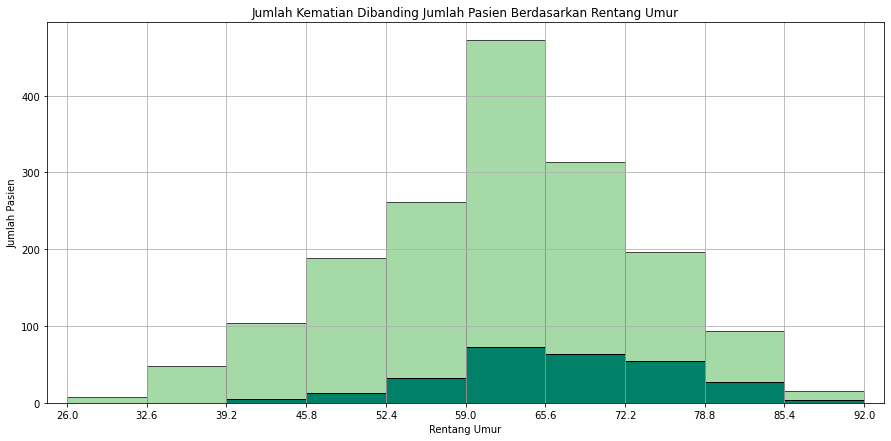

In [ ]:
# mendefinisikan figure
_, ax = plt.subplots()

# visualisasi jumlah pasien
pd.Series(data=count_all).plot(kind='bar', figsize=(15, 7), colormap='Accent', width=1, edgecolor='k',
                  xticks=np.arange(-.5, 10.5, 1), ax=ax, alpha=.7).set_xticklabels(bin_edge_all.round(2))
# visualisasi jumlah kematian pasien
kematian_umur.plot(kind='bar', figsize=(15, 7), colormap='summer', width=1, edgecolor='k',
                  xticks=np.arange(-.5, 10.5, 1), ax=ax).set_xticklabels(bin_edge_all.round(2))

plt.title("Jumlah Kematian Dibanding Jumlah Pasien Berdasarkan Rentang Umur")
plt.ylabel("Jumlah Pasien")
plt.xlabel("Rentang Umur")
plt.xticks(rotation=0)
plt.grid(True, axis='both')

plt.show()

--> Rumusan masalah

1. Berapa rentang usia pasien yang paling banyak meninggal akibat penyakit jantung?

2. Pada usia berapa pasien memiliki harapan hidup lebih rendah akibat penyakit jantung yang dideritanya?

--> Analisa / Penjelasan

Pada visualisasi di atas, ditampilkan histogram yang menunjukkan jumlah pasien yang meninggal dibanding jumlah pasien berdasarkan rentang umur. Diketahui, tingkat kematian tertinggi ada pada pasien lanjut usia, yaitu pasien dengan rentang umur 60 ke atas. Selain itu, diketahui juga bahwa pasien dengan umur 59 ke atas cenderung meninggal dunia akibat penyakit jantung dibandingkan pasien dengan umur 59 ke bawah. Hal ini dapat disimpulkan dengan membandingkan antara jumlah pasien dan jumlah pasien yang meninggal.

**Visualisasi Bar Plot untuk Jumlah Kematian Dibanding Jumlah Pasien Berdasarkan Jenis Kelamin**

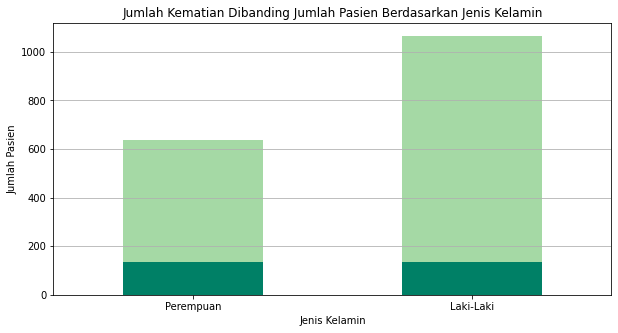

In [ ]:
# mendefinisikan figure
_, ax = plt.subplots()

# visualisasi jumlah pasien
jumlah_sex_pasien.plot(kind='bar', figsize=(10, 5), ax=ax, colormap='Accent', alpha=.7)
# visualisasi jumlah kematian pasien
kematian_sex.plot(kind='bar', figsize=(10, 5), ax=ax, colormap='summer')

plt.title("Jumlah Kematian Dibanding Jumlah Pasien Berdasarkan Jenis Kelamin")
plt.ylabel("Jumlah Pasien")
plt.xlabel("Jenis Kelamin")
plt.xticks(rotation=0)
plt.grid(True, axis='y')

plt.show()

--> Rumusan masalah

1. Di antara pasien laki-laki dan perempuan, pasien manakah yang paling banyak meninggal akibat penyakit jantung?

2. Di antara pasien laki-laki dan perempuan, pasien manakah yang memiliki harapan hidup lebih rendah akibat penyakit jantung yang dideritanya?

--> Analisa / Penjelasan

Pada visualisasi di atas, ditampilkan bar plot yang menunjukkan jumlah kematian pasien dibandingkan jumlah pasien berdasarkan jenis kelamin. Di sini, perbandingan jumlah pasien dan jumlah pasien meninggal akan dipertimbangkan. Diketahui, jumlah pasien perempuan lebih sedikit dibanding pasien laki-laki, namun memiliki jumlah pasien meninggal yang hampir sama dengan pasien laki-laki. Oleh sebab itu, dapat disimpulkan bahwa rasio atau tingkat kematian pasien perempuan lebih banyak dibandingkan dengan pasien laki-laki.

**Dua Visualisasi Tree Map untuk Perbandingan Diagnosa Kematian Utama pada Pasien Perempuan dan Laki-laki**

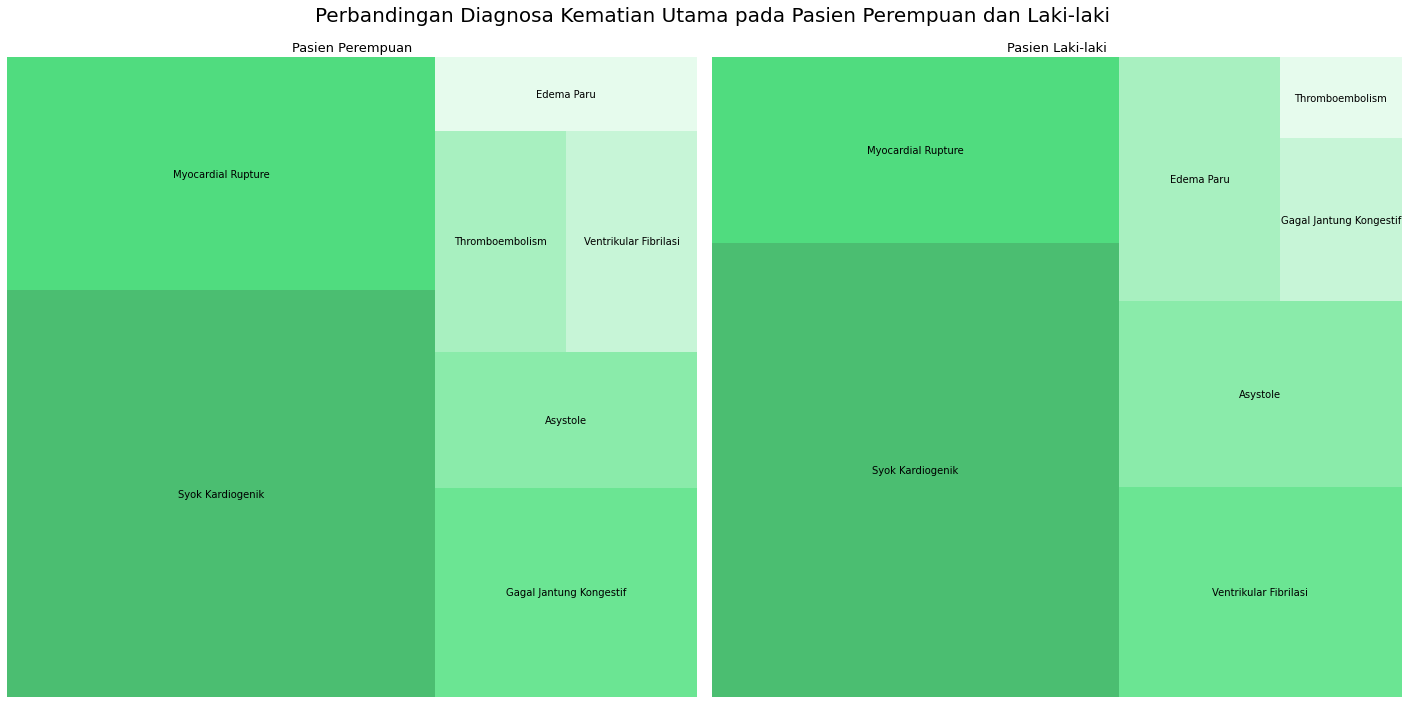

In [ ]:
# mendefinisikan figure
fig = plt.figure(figsize=(20,10))
gs = fig.add_gridspec(1,2)
fig.suptitle("Perbandingan Diagnosa Kematian Utama pada Pasien Perempuan dan Laki-laki", fontsize=20)
colors=['#1eae4e','#25d45f','#47df79', '#6de695', '#93edb1', '#baf3cd', '#e0fae9']

# plot 1 - diagnosa kematian utama pasien perempuan
ax1 = fig.add_subplot(gs[0, 0])
ax1 = squarify.plot(sizes=kematian_perempuan, label=kematian_perempuan.index,
        color=colors, alpha=.8)
plt.title("Pasien Perempuan", fontsize=13)
plt.axis('off')

# plot 2 - diagnosa kematian utama pasien laki-laki
ax2 = fig.add_subplot(gs[0, 1])
ax2 = squarify.plot(sizes=kematian_laki, label=kematian_laki.index,
        color=colors, alpha=.8)
plt.title("Pasien Laki-laki", fontsize=13)
plt.axis('off')

plt.tight_layout(pad=1.5)
plt.show()

--> Rumusan masalah

1. Apa diagnosa penyakit jantung yang paling utama yang menyebabkan kematian pasien perempuan dan laki-laki?

2. Apa diagnosa penyakit jantung yang paling jarang menyebabkan kematian pasien perempuan dan laki-laki?

--> Analisa / Penjelasan

Pada visualisasi di atas, ditampilkan dua buah tree map yang menunjukkan diagnosa kematian utama pada pasien perempuan dan laki-laki. Tree map tersebut merupakan tree map yang sama dengan visualisasi sebelumnya. Namun, disini kedua tree map disejajarkan untuk melihat perbandingan antara keduanya. Diketahui, Syok Kardiogenik merupakan diagnosa utama yang menyebabkan kematian pasien perempuan dan laki-laki, disusul oleh Myocardial Rupture. Kemudian, 5 diagnosa utama lainnya bervariasi untuk pasian perempuan dan laki-laki.

<hr>
<hr>

# 3. Machine Learning


## 3.1. K-Fold Cross Validation

Pembuatan Set Data Validasi dan K-Fold Cross Validation

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import warnings

# membuat dict kosong untuk menyimpan hasil k-fold
results_svm = {}
results_dt = {}

Pembagian data training/latih dan data validation/uji dengan rasio 80:20.

In [ ]:
# memisahkan fitur dan kelas dataset
array = df.values
X = array[:,0:123]
y = array[:,123]

# train-test-split dengan rasio 80% training dan 20% testing
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

Mendefinisikan Hyperparameter yang akan dicoba

In [ ]:
# SVM Hyperparameter
# precomputed tidak digunakan karena dataset dibentuk dalam dataframe, bukan matrix
svm_hyper = ['linear', 'poly', 'rbf', 'sigmoid']

# DT Hyperparameter
dt_hyper = ['gini', 'entropy', 'log_loss']

In [ ]:
# SVM
warnings.filterwarnings("ignore")

results_svm = {}

for hyper in svm_hyper:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    model = SVC(gamma='auto', kernel=hyper, random_state=1)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results_svm[hyper] = cv_results.mean()

results_svm

{'linear': 0.9191176470588236,
 'poly': 0.9132352941176471,
 'rbf': 0.8926470588235293,
 'sigmoid': 0.8330882352941178}

didapatkan bahwa hyperparameter terbaik untuk SVM ialah kernel linear.

In [ ]:
# DT
warnings.filterwarnings("ignore")

splitter_dt = ['best', 'random']

for dt_split in splitter_dt:
    results_dt = {}
    for hyper in dt_hyper:
        kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
        model = DecisionTreeClassifier(criterion=hyper, splitter=dt_split, random_state=1)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
        results_dt[hyper] = cv_results.mean()
    print('splitter : ' + dt_split)
    print(results_dt)
    print()

splitter : best
{'gini': 0.9713235294117647, 'entropy': 0.9691176470588235, 'log_loss': nan}

splitter : random
{'gini': 0.9470588235294117, 'entropy': 0.9375, 'log_loss': nan}



Didapatkan bahwa hyperparameter terbaik untuk DT ialah spliiter best dengan criterion gini.

## 3.2. Training dan Testing

### Prediksi SVM

In [ ]:
# oversampling dengan algoritma SMOTE (Synthetic Minority Oversampling Technique)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, Y_train)

In [ ]:
# membuat model dan prediksi SVM
model_SVM = SVC(gamma='auto',kernel='linear',random_state=1)
model_SVM.fit(X_train, Y_train)
predictions_SVM = model_SVM.predict(X_validation)

In [ ]:
# mencetak classification report untuk evaluasi algoritma SVM
X, y = make_classification(n_samples=340, n_features=20, n_informative=15, n_redundant=5, random_state=1)
print(classification_report(Y_validation, predictions_SVM))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       296
         1.0       0.69      0.58      0.63        19
         2.0       0.33      0.67      0.44         3
         3.0       1.00      1.00      1.00         8
         4.0       0.75      0.43      0.55         7
         5.0       0.00      0.00      0.00         3
         6.0       0.33      0.50      0.40         2
         7.0       0.00      0.00      0.00         2

    accuracy                           0.94       340
   macro avg       0.51      0.52      0.50       340
weighted avg       0.93      0.94      0.93       340



### Prediksi Decision Tree

In [ ]:
# membuat model dan prediksi DT
model_DT = DecisionTreeClassifier(criterion='gini',splitter='best', random_state=1)
model_DT.fit(X_train, Y_train)
predictions_DT = model_DT.predict(X_validation)

In [ ]:
# mencetak classification report untuk evaluasi algoritma DT
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
print(classification_report(Y_validation, predictions_DT))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       296
         1.0       0.86      1.00      0.93        19
         2.0       1.00      0.33      0.50         3
         3.0       1.00      1.00      1.00         8
         4.0       1.00      1.00      1.00         7
         5.0       0.50      0.67      0.57         3
         6.0       1.00      1.00      1.00         2
         7.0       0.00      0.00      0.00         2

    accuracy                           0.98       340
   macro avg       0.80      0.75      0.75       340
weighted avg       0.98      0.98      0.98       340



### Metric Evaluasi

In [ ]:
# mengambil laporan evaluasi tertentu pada classification report SVM
cr_SVM = classification_report(Y_validation, predictions_SVM, output_dict=True)
print(cr_SVM['accuracy'])
print(cr_SVM['weighted avg'])

0.9352941176470588
{'precision': 0.9297413442121035, 'recall': 0.9352941176470588, 'f1-score': 0.9307071645469516, 'support': 340}


In [ ]:
# mengambil laporan evaluasi tertentu pada classification report DT
cr_DT = classification_report(Y_validation, predictions_DT, output_dict=True)
print(cr_DT['accuracy'])
print(cr_DT['weighted avg'])

0.9823529411764705
{'precision': 0.9820855614973263, 'recall': 0.9823529411764705, 'f1-score': 0.980362340553406, 'support': 340}


In [ ]:
# convert laporan evaluasi tertentu classification report menjadi series
# SVM
cr_SVM_Series = pd.Series(data=cr_SVM['weighted avg'])
cr_SVM_Series = cr_SVM_Series.append(pd.Series(data=cr_SVM['accuracy'], index=['accuracy']))
cr_SVM_Series.name = 'SVM'
# cr_SVM_Series

# DT
cr_DT_Series = pd.Series(data=cr_DT['weighted avg'])
cr_DT_Series = cr_DT_Series.append(pd.Series(data=cr_DT['accuracy'], index=['accuracy']))
cr_DT_Series.name = 'DT'
# cr_DT_Series

# memasukkan series SVM dan DT ke dalam dataframe
df_model = pd.concat([cr_SVM_Series, cr_DT_Series], axis=1)
df_model

,SVM,DT
precision,0.929741,0.982086
recall,0.935294,0.982353
f1-score,0.930707,0.980362
support,340.000000,340.000000
accuracy,0.935294,0.982353


### Visualisasi Perbandingan Model

In [ ]:
# memasukkan laporan evaluasi sebelumnya ke dalam dataframe
df_model_vis = df_model.copy(deep=True)
df_model_vis.drop('support', inplace = True)
df_model_vis

,SVM,DT
precision,0.929741,0.982086
recall,0.935294,0.982353
f1-score,0.930707,0.980362
accuracy,0.935294,0.982353


**Visualisasi Bar Plot untuk Perbandingan Performa Model Machine Learning, yaitu SVM dan DT**

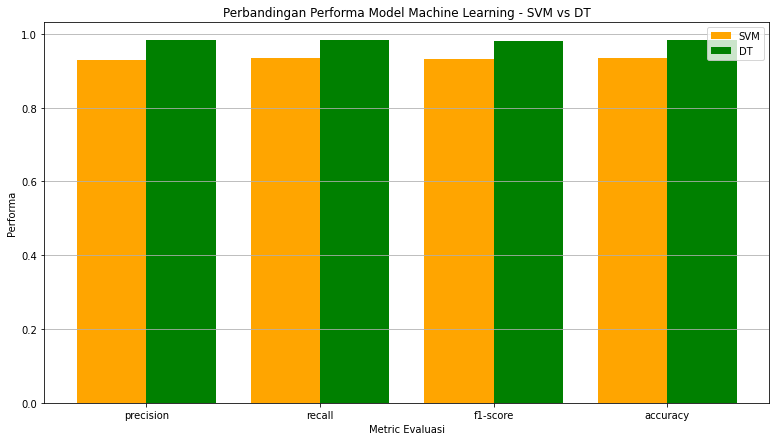

In [ ]:
# visualisasi perbandingan performa SVM dan DT
fig = plt.figure(figsize=(13,7))
gs = fig.add_gridspec(1,1)

ax1 = fig.add_subplot(gs[0, 0])
X_axis = np.arange(len(df_model_vis))
ax1.bar(X_axis - 0.2, df_model_vis['SVM'], 0.4, label = 'SVM', color='orange')
ax1.bar(X_axis + 0.2, df_model_vis['DT'], 0.4, label = 'DT', color='green')
ax1.set_xticks(X_axis, df_model_vis.index, rotation=0)
ax1.set_title("Perbandingan Performa Model Machine Learning - SVM vs DT")
ax1.set_ylabel("Performa")
ax1.set_xlabel("Metric Evaluasi")
ax1.legend()
ax1.grid(True, axis='y')

--> Analisa / Penjelasan

Pada langkah langkah sebelumnya, telah dilakukan training dan testing menggunakan algoritma SVM dan Decision Tree (DT). Hasil evaluasi testing juga telah dilakukan pada langkah sebelumnya menggunakan classification report. Dari laporan evaluasi tersebut, diambil akurasi dan weighted average dari precision, recall, dan f1-score.

Pada visualisasi di atas, ditampilkan bar plot yang menunjukkan perbandingan performa model machine learning (SVM dan DT) berdasarkan classification report yang telah diambil sebelumnya. Diketahui dari keempat parameter evaluasi tersebut, performa algoritma Decision Tree lebih unggul daripada algoritma SVM. Dengan kata lain, Decision Tree merupakan algoritma yang dapat menyelesaikan permasalahan dataset Myocardial Infarction Complication dengan sangat baik.

## 3.3. Confusion Matrix

### Confusion Matrix - SVM

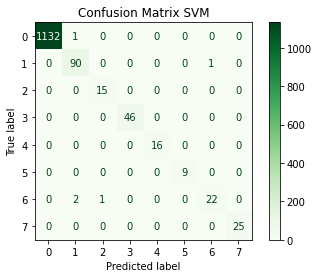

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# MODEL SVM
disp_svm = ConfusionMatrixDisplay.from_estimator(
    model_SVM,
    X_train, Y_train,
    display_labels=np.arange(8),
    cmap=plt.cm.Greens
)
disp_svm.ax_.set_title('Confusion Matrix SVM')
# print(disp_svm.confusion_matrix)

plt.show()

In [ ]:
# membuat Dataframe kosong untuk menyimpan Confusion Matrix
nama_kelas = jumlah_tiap_kelas.index
df_confsvm = pd.DataFrame(index=nama_kelas, columns=['TP', 'FP', 'FN', 'TN'])
# df_confsvm

# Mendapatkan TP / True Positive
for i in range(8):
    df_confsvm.iloc[i].TP = disp_svm.confusion_matrix[i][i]

# Mendapatkan FP / False Positive
for i in range(8):
    count=0
    for j in range(8):
        if i == j:
            continue
        else:
            count+=disp_svm.confusion_matrix[i][j]
    # print(count)
    df_confsvm.iloc[i].FP = count

# Mendapatkan FN / False Negative
for i in range(8):
    count=0
    for j in range(8):
        if i == j:
            continue
        else:
            count+=disp_svm.confusion_matrix[j][i]
    #print(count)
    df_confsvm.iloc[i].FN = count

# Mendapatkan TN / True Negative
for x in range(8):
    count=0
    for i in range(8):     
        for j in range(8):
            if (i == x) or (j == x):
                continue
            else:
                count+=disp_svm.confusion_matrix[j][i]
    df_confsvm.iloc[x].TN = count

df_confsvm

,TP,FP,FN,TN
Hidup,1132,1,0,227
Syok Kardiogenik,90,1,3,1266
Edema Paru,15,0,1,1344
Myocardial Rupture,46,0,0,1314
Gagal Jantung Kongestif,16,0,0,1344
Thromboembolism,9,0,0,1351
Asystole,22,3,1,1334
Ventrikular Fibrilasi,25,0,0,1335


### Confusion Matrix - DT

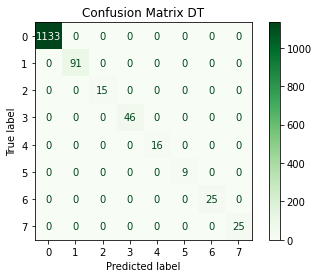

In [ ]:
# MODEL DT
disp_dt = ConfusionMatrixDisplay.from_estimator(
    model_DT,
    X_train, Y_train,
    display_labels=np.arange(8),
    cmap=plt.cm.Greens
)
disp_dt.ax_.set_title('Confusion Matrix DT')
# print(disp_dt.confusion_matrix)

plt.show()

In [ ]:
# membuat Dataframe kosong untuk menyimpan Confusion Matrix
nama_kelas = jumlah_tiap_kelas.index
df_confdt = pd.DataFrame(index=nama_kelas, columns=['TP', 'FP', 'FN', 'TN'])
# df_confdt

# Mendapatkan TP / True Positive
for i in range(8):
    df_confdt.iloc[i].TP = disp_dt.confusion_matrix[i][i]

# Mendapatkan FP / False Positive
for i in range(8):
    count=0
    for j in range(8):
        if i == j:
            continue
        else:
            count+=disp_dt.confusion_matrix[i][j]
    # print(count)
    df_confdt.iloc[i].FP = count

# Mendapatkan FN / False Negative
for i in range(8):
    count=0
    for j in range(8):
        if i == j:
            continue
        else:
            count+=disp_dt.confusion_matrix[j][i]
    #print(count)
    df_confdt.iloc[i].FN = count

# Mendapatkan TN / True Negative
for x in range(8):
    count=0
    for i in range(8):     
        for j in range(8):
            if (i == x) or (j == x):
                continue
            else:
                count+=disp_dt.confusion_matrix[j][i]
    df_confdt.iloc[x].TN = count

df_confdt

,TP,FP,FN,TN
Hidup,1133,0,0,227
Syok Kardiogenik,91,0,0,1269
Edema Paru,15,0,0,1345
Myocardial Rupture,46,0,0,1314
Gagal Jantung Kongestif,16,0,0,1344
Thromboembolism,9,0,0,1351
Asystole,25,0,0,1335
Ventrikular Fibrilasi,25,0,0,1335


<hr>
<hr>

# 4. Dashboard

Google Data Studio

Export Dataset & Evaluasi Model ke File Excel

In [ ]:
# Membuat Pandas Excel writer dengan XlsxWriter sebagai engine
writer = pd.ExcelWriter('Myocardial Infarction - Kel 3.xlsx')

# Write data ke worksheet berbeda
df.to_excel(writer, sheet_name='Dataset')
df_model.to_excel(writer, sheet_name='Evaluasi Model')

# Close Pandas Excel writer dan output file Excel
writer.save()

Output dari kode di atas adalah file excel (xlsx) yang terdiri dari 2 sheet. Sheet pertama berisi dataset yang telah dilakukan preprocessing, sedangkan sheet kedua berisi classification report dari algoritma SVM dan DT seperti yang telah divisualisasikan sebelumnya. File excel ini kemudian akan digunakan dalam Google Data Studio untuk pembuatan dashboard.

<hr>
<hr>
<hr>

Alhamdulillah.

Visualisasi Data - TIF A  /  Kelompok 3

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2dde367c-bfe6-49eb-b791-d5c19f996f91' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>